## House Prices Prediction using Regression Algorithm

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Import dataset
data = pd.read_csv("E:\PYTHON.AMITY\Housing.csv")

In [4]:
data.head()  #Extracting the starting values of the dataset
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [7]:
print("Housing dataset dimention:",format(data.shape)) #dimentions of the dataset- (rows,columns)

Housing dataset dimention: (1460, 81)


In [9]:
#exctracting features containing NaN values
f_with_NaN = [f for f in data.columns
              if data[f].isnull().sum() >=1]
print("Features containing NaN values: ")
f_with_NaN

Features containing NaN values: 


['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [10]:
#calculate the percentage of missing or NaN values in the dataset
for f in f_with_NaN:
    num_of_NaN = data[f].isnull().sum()
    total = len(data)
    print("{} : {}% missing values".format(f,round((num_of_NaN/total)*100,2)))

LotFrontage : 17.74% missing values
Alley : 93.77% missing values
MasVnrType : 0.55% missing values
MasVnrArea : 0.55% missing values
BsmtQual : 2.53% missing values
BsmtCond : 2.53% missing values
BsmtExposure : 2.6% missing values
BsmtFinType1 : 2.53% missing values
BsmtFinType2 : 2.6% missing values
Electrical : 0.07% missing values
FireplaceQu : 47.26% missing values
GarageType : 5.55% missing values
GarageYrBlt : 5.55% missing values
GarageFinish : 5.55% missing values
GarageQual : 5.55% missing values
GarageCond : 5.55% missing values
PoolQC : 99.52% missing values
Fence : 80.75% missing values
MiscFeature : 96.3% missing values


there are 4 features having missing values greater than 80%
So let'scheck their dependency with the target variable 'SalePrice'

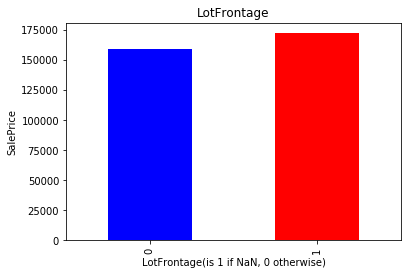

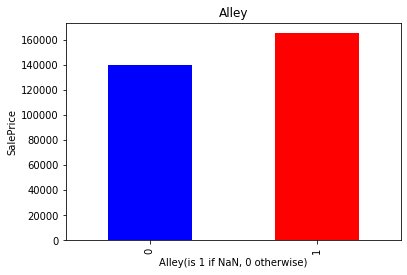

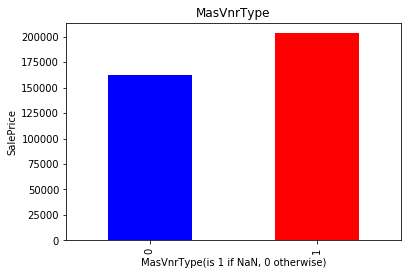

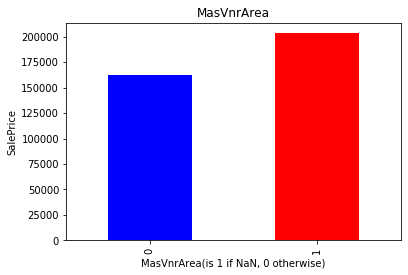

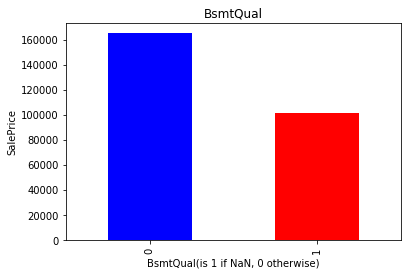

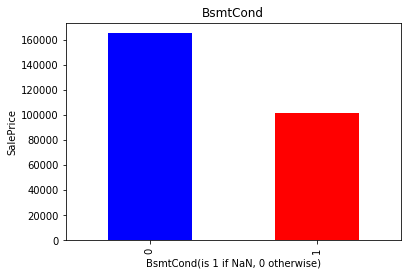

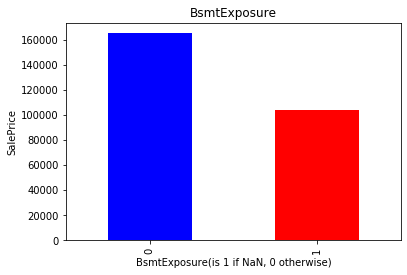

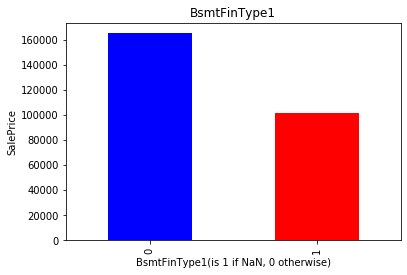

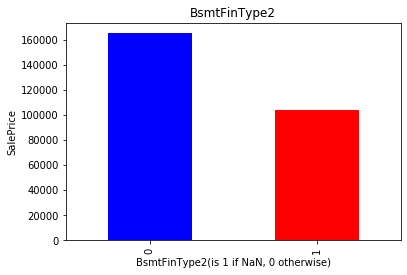

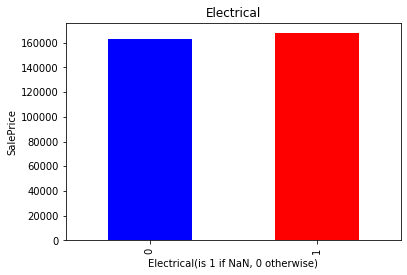

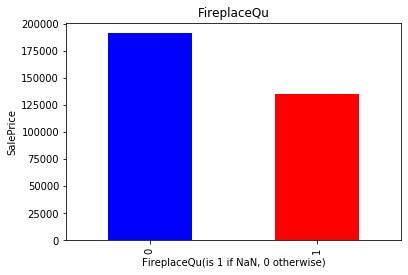

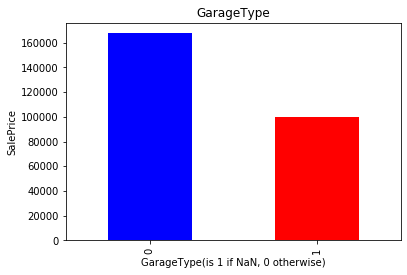

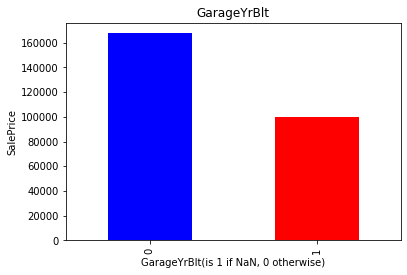

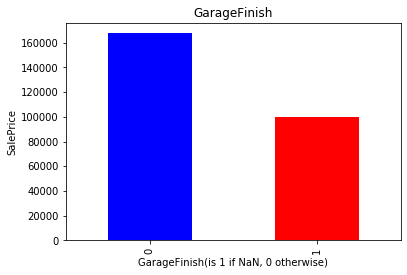

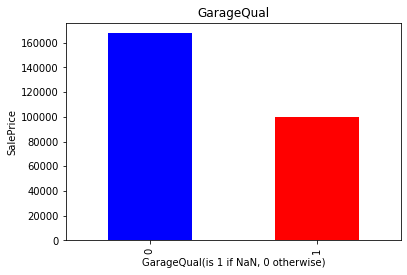

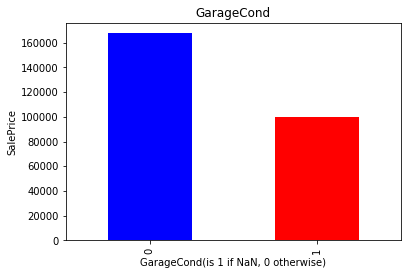

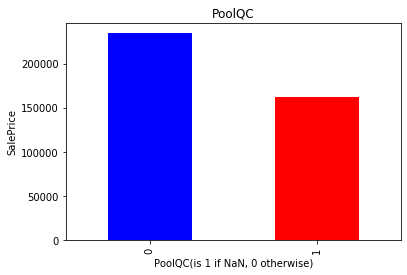

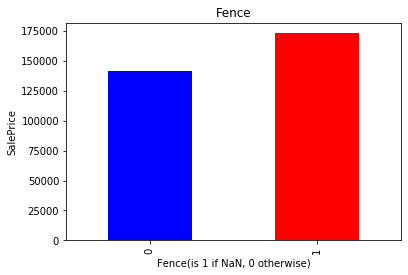

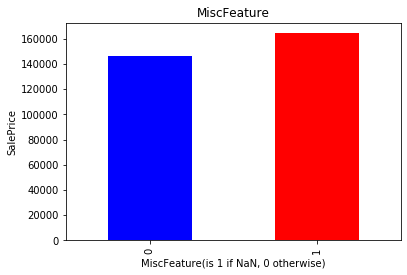

In [11]:
for f in f_with_NaN:
    df = data.copy()
    df[f] = np.where(df[f].isnull(),1,0)
    df.groupby(f)['SalePrice'].median().plot.bar(color = ['blue','red'])
    plt.xlabel(f + '(is 1 if NaN, 0 otherwise)')
    plt.ylabel('SalePrice')
    plt.title(f)
    plt.show()

In [ ]:
#As we can see NaN values have significant relation with the target variable 'SalePrice'. 
#So we cannot drop these columns or  values. 

In [13]:
#drop 'Id'
data.drop(['Id'],axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [16]:
#List of numerical features

numerical_fea = [f for f in data.columns
                if data[f].dtypes != 'O']
print('Total numerical features : ',len(numerical_fea))
data[numerical_fea].head()
 

Total numerical features :  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [17]:
#List of tmporal features
year_fea = [f for f in numerical_fea 
           if 'Yr' in f or 'Year' in f]
year_fea

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [18]:
#list of variables containg discrete values

discrete_fea = [f for f in numerical_fea
               if data[f].nunique()<25 and f not in year_fea+['Id']]

print("Total discrete variables are : ",len(discrete_fea))
data[discrete_fea].head()

Total discrete variables are :  17


,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


In [19]:
#list of continuous features

conti_fea = [f for f in data.columns
            if data[f].nunique() > 25 and f not in year_fea+['Id']] 
print("Total continuous features are : ",len(conti_fea))
data[conti_fea].head()

Total continuous features are :  16


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


In [20]:
#list of categorical features

cat_fea = [f for f in data.columns
          if data[f].dtypes == 'O']
print("Total categorical features are: ",len(cat_fea))
data[cat_fea].head()

Total categorical features are:  43


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [23]:
#Replacing NaN values in categorical features with new label 'mising'

cat_fea_nan = [f for f in data.columns
          if data[f].isnull().sum()>1 and data[f].dtypes == 'O']

def replace_nan (data, f):
    data[f] = data[f].fillna('Missing')
    
replace_nan(data,cat_fea_nan)

In [24]:
#Replacing NaN values in numerical features with median

num_fea_nan = [f for f in data.columns
              if data[f].isnull().sum()>1 and data[f].dtypes !='O']

for f in num_fea_nan:
    median = data[f].median()
    data[f+'_nan'] = np.where(data[f].isnull(),1,0)
    data[f].fillna(median, inplace = True)

In [25]:
#Converting 'year' value to 'total number of years'

for f in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    data[f]= data['YrSold']- data[f]

In [63]:
#Log transformation of skewed continuous numerical features

for feature in ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']:
    data[feature] = np.log(data[feature])
    np.seterr(divide='ignore')

In [64]:
#Handling Rare categories in categorical  features

for f in cat_fea:
    temp = data.groupby(f)['SalePrice'].count()/len(data)
    temp_df = temp[temp >0.01].index
    temp_df = np.where(data[f].isin(temp_df),data[f],'rare_variables')

In [65]:
#Encoding Categorical features

for f in cat_fea:
    labels_ordered = data.groupby([f])['SalePrice'].mean().sort_values().index
    labels_ordered = {k:i for i,k in enumerate(labels_ordered,0)}
    data[f] = data[f].map(labels_ordered)

In [93]:
data.replace(np.nan, -1, inplace = True)

## Model building and training

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

X = data.drop(['Id','SalePrice'], axis = 1)
y = data['SalePrice']


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

clf = RandomForestRegressor()
clf.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [96]:
#PREDICTION

y_pred = clf.predict(X_test)

accuracy = r2_score(y_pred, y_test)
accuracy

0.7977441196602799